In [1]:

import numpy as np # linear algebra
import pandas as pd
from sklearn import preprocessing

In [2]:
#Read the dataset

data_csv = pd.read_csv('./Real estate.csv', error_bad_lines=False)
data_csv.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


# 1. Select a  data points and plot each feature with it's corresponding Y value.

In [3]:
import matplotlib.pyplot as plt

data_csv=data_csv.drop(['No'], axis=1)

x = data_csv['X2 house age']
y = data_csv['Y house price of unit area']

X = np.array(x)
Y = np.array(y)

plt.scatter(X,Y)
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
data_csv.shape


(414, 7)

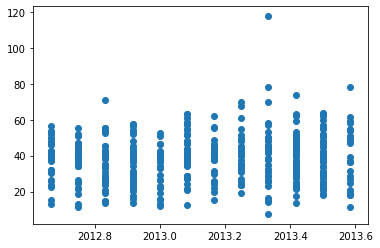

In [5]:
x = data_csv['X1 transaction date']
y = data_csv['Y house price of unit area']

X = np.array(x)
Y = np.array(y)

plt.scatter(X,Y)
plt.show()

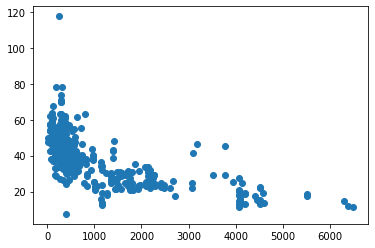

In [6]:
x = data_csv['X3 distance to the nearest MRT station']
y = data_csv['Y house price of unit area']

X = np.array(x)
Y = np.array(y)

plt.scatter(X,Y)
plt.show()

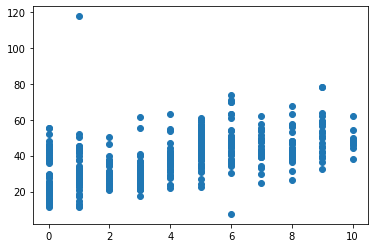

In [7]:
x = data_csv['X4 number of convenience stores']
y = data_csv['Y house price of unit area']

X = np.array(x)
Y = np.array(y)

plt.scatter(X,Y)
plt.show()

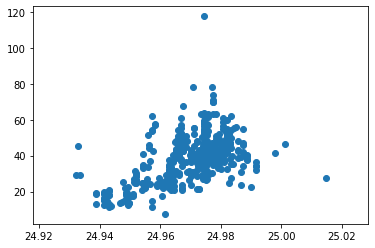

In [8]:
x = data_csv['X5 latitude']
y = data_csv['Y house price of unit area']

X = np.array(x)
Y = np.array(y)

plt.scatter(X,Y)
plt.show()

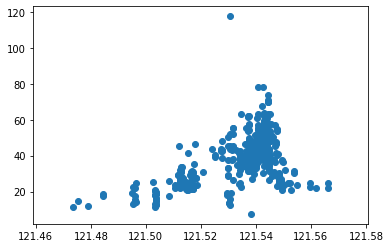

In [9]:
x = data_csv['X6 longitude']
y = data_csv['Y house price of unit area']

X = np.array(x)
Y = np.array(y)

plt.scatter(X,Y)
plt.show()

# 2. Split dataset into train and test.

In [10]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_csv, test_size=0.3)

# 3. Perform linear regression using GD and SGD.

In [11]:
#Create X and Y arrays for training data
X_train = train.drop("Y house price of unit area", axis=1)
X_train=preprocessing.normalize(X_train);
y_train = train["Y house price of unit area"]







In [12]:
X_test = test.drop("Y house price of unit area", axis=1)
X_test=preprocessing.normalize(X_test);
y_test = test["Y house price of unit area"]
y_test=np.array(y_test);

X_test.shape, y_test.shape

((125, 6), (125,))

In [13]:
def F(w,X_array,y_array):
    value = 0
#     X_local = data.drop("Y house price of unit area", axis=1)
#     y_local = data["Y house price of unit area"]
   
    
#     X_array=preprocessing.normalize(X_local);
#     y_array=preprocessing.normalize(y_local);
    
# #     X_array=np.array(X_local);
    y_array=np.array(y_array);
    w=w.reshape(6,1)
 
  
    for i in range(len(X_array)):
        value = value + (X_array[i].dot(w)-y_array[i])**2
    return value/len(X_array)

In [14]:
 w = np.zeros(len(data_csv.columns)-1)
F(w,X_train, y_train)

array([1645.44532872])

In [15]:
def dF(w,X_array,y_array):
    value = 0
#     X_local = data.drop("Y house price of unit area", axis=1)
#     y_local = data["Y house price of unit area"]
   
    w=w.reshape(6,1);
#     X_array=preprocessing.normalize(X_local);
#     y_array=preprocessing.normalize(y_local);
# #     X_array=np.array(X_local);
    y_array=np.array(y_array);
   
    for i in range(len(X_array)):
        value = value + 2*(X_array[i].dot(w)-y_array[i])*X_array[i]
    return value/len(X_array)    

In [16]:
w = np.zeros(len(data_csv.columns)-1)
print(dF(w,X_train, y_train))

[-69.89973132  -0.58380757 -21.9596189   -0.16811574  -0.86706478
  -4.21995792]


In [17]:
def sF(w,i,X_array,y_array):
   
    
#     X_local = data.drop("Y house price of unit area", axis=1)
#     y_local = data["Y house price of unit area"]
    
#     X_array=preprocessing.normalize(X_local);
#     y_array=preprocessing.normalize(y_local);
#     X_array=np.array(X_local);
    y_array=np.array(y_array);
    
    
    value = (X_array[i].dot(w)-y_array[i])**2
    return value

In [18]:

def sdF(w,i,X_array,y_array):
#     X_local = data.drop("Y house price of unit area", axis=1)
#     y_local = data["Y house price of unit area"]
#     X_array=preprocessing.normalize(X_local);
#     y_array=preprocessing.normalize(y_local);
    
#     X_array=np.array(X_local);
    y_array=np.array(y_array);
    value = 2*(X_array[i].dot(w)-y_array[i])*X_array[i];
    return value

In [19]:
def gradientD():
    w = np.zeros(len(data_csv.columns)-1)
    l = 1
    for i in range(1000):
        f = F(w,X_train, y_train)
        g = dF(w,X_train, y_train)
        w = w - l * g
        #print("iteration : {},w : {}, f : {}, g :{}".format(i,w,f,g))
    return w.reshape(6,1);    
        

In [20]:
gradientD()

array([[ 46.80591914],
       [-37.30259496],
       [ -8.55838504],
       [  5.89362862],
       [  0.59994266],
       [  2.79439739]])

In [21]:
def stochasticGradientD():
    w = np.zeros(len(data_csv.columns)-1)
    l = 0.1
    print(len(train));
    for i in range(1000):
        for j in range(len(train)):
            f = sF(w,j,X_train, y_train)
            g = sdF(w,j,X_train, y_train)
            w = w - l * g
            #print("iteration : {},w : {}, f : {}, g :{}".format(i,w,f,g))
        return w.reshape(6,1);    

In [22]:
stochasticGradientD()

289


array([[48.14466705],
       [-0.69108887],
       [-8.1551875 ],
       [ 0.33185346],
       [ 0.59791622],
       [ 2.90595114]])

# Prediction 

In [23]:
y_pred=X_test.dot(gradientD())
print(type(y_pred))
print(y_pred.shape)
print(type(y_test))
y_test=y_test.reshape(125,1)
print(y_test.shape)

gradient_dataset = pd.DataFrame({'y_pred':y_pred[:, 0] ,'y_test': y_test[:, 0]})
print(gradient_dataset)


<class 'numpy.ndarray'>
(125, 1)
<class 'numpy.ndarray'>
(125, 1)
        y_pred  y_test
0    44.858964    46.7
1    46.255673    47.0
2    45.618417    53.3
3    25.823684    31.3
4    31.792720    28.9
..         ...     ...
120  46.783113    47.7
121  38.336179    37.7
122  44.958071    53.3
123  45.104184    51.6
124  12.987112    15.6

[125 rows x 2 columns]


In [24]:
y_pred2=X_test.dot(stochasticGradientD())

stc_gradient_dataset = pd.DataFrame({'y_pred':y_pred2[:, 0] ,'y_test': y_test[:, 0]})
print(stc_gradient_dataset)

289
        y_pred  y_test
0    46.593610    46.7
1    47.745334    47.0
2    47.518537    53.3
3    27.082308    31.3
4    33.168382    28.9
..         ...     ...
120  48.138525    47.7
121  39.988367    37.7
122  46.584255    53.3
123  46.659309    51.6
124  14.054442    15.6

[125 rows x 2 columns]


# Comments

1. According to the weights of both Gradient Descent and Stochastic gradient Descent , transaction date seems the most important variable in predicting the price.
2. The feature 'X3 distance to the nearest MRT station' seems to be effect only in the lower pricing range houses which are less than 3000.
3. The feature 'X2 house age' & 'X3 distance to the nearest MRT station' seems to be negative effect on the prices.
4. The features 'X4 number of convenience stores' &	'X5 latitude' has almost negligible contrubution in prediction the house prices.